# "[BOAZ] CNN_assignment - 17기 손형락"
> "Convolution Neural Network"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Rauk
- categories: [BOAZ, Deeplearning, CNN]

## Library Import

In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation, ReLU, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K 

from tensorflow.keras.datasets import cifar10

In [ ]:
# class 개수 지정
NUM_CLASSES = 10

In [ ]:
# CIFAR-10 dataset load
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


- **Assignment 1: X_train, X_test, y_train, y_test의 shape과 형식을 출력해보세요. (각각 출력해도 됩니다!)**

In [ ]:
## 여기에!

print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)

print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (50000, 32, 32, 3)
X_test shape :  (10000, 32, 32, 3)
y_train shape :  (50000, 1)
y_test shape :  (10000, 1)


In [ ]:
# 기본적으로 image data는 pixel channel마다 0~255 integer로 구성되는데,
# 신경망은 input이 -1~1 범위에서 가장 잘 동작하기 때문에 데이터를 255로 나눈다.
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# image의 integer label을 one-hot encoding vector로 바꾼다.
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

- **Assignment 2: 변환된 y_train, y_test의 shape을 출력해보세요.**

In [ ]:
## 여기에!
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

y_train shape :  (50000, 10)
y_test shape :  (10000, 10)


- **Assignment 3: X_train에서, index 54의 이미지에서 (12,13) 위치에 해당하는 픽셀의 초록 채널(1) 값을 출력해보세요. (힌트: X_train[?,?,?,?])**

In [ ]:
## 여기에!
X_train[54,12,13,1]

0.36862746

## Modeling

Keras에서 신경망 구조를 정의하는 방법은 **Sequential 모델**과 **함수형 API** 두 가지가 있습니다.  

Sequential 모델은 일렬로 층을 쌓은 네트워크를 빠르게 만들 때 사용하기 좋습니다. 즉 어떤 분기가 없이 이전 층이 그대로 다음 층으로 연결됩니다.  
하지만 한 층의 출력이 여러 개의 별도의 층으로 전달되거나, 한 층이 여러 층으로부터 입력을 받는 등의 가지가 있는 네트워크를 만들기 위해서는 유연성이 많은 함수형 API를 사용하는 것이 좋습니다.  
Keras에서도 단순한 모델을 만들더라도 Sequential 모델보다 함수형 API를 권장합니다. 장기적으로 보면 모델이 점점 복잡한 구조가 될 수 있기 때문입니다.  
함수형 API는 Deep Neural Network 구조를 설계하는 데에 있어 엄청난 자유를 제공합니다.

따라서 본 assignment에서는 함수형 API를 사용하여 Modeling을 진행하였습니다.

In [ ]:
input_layer = Input(shape=(32,32,3))

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)


model = Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

## Train

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0005), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


- **Assignment 4: loss를 categorical_crossentropy로 설정한 이유는 무엇일까요?**
- 답: 특정 물체에 대해 맞다(1) 아니다(0)의 이진분류가 아닌 여러 가지의 것들을 분류하는 Multiclass Classification이므로 categorical_crossentropy 설정하였다.
- 입력으로 들어온 값들을 출력층에서 softmax함수로 처리하여 각 class별로 확률값이 나오는데 확률이 낮을수록 loss가 커지고, 크면 loss가 낮다. 

In [ ]:
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
model.fit(X_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          shuffle=True,
          validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 126s 80ms/step - loss: 1.4686 - accuracy: 0.4771 - val_loss: 1.2742 - val_accuracy: 0.5435
Epoch 2/10
1563/1563 [==============================] - 123s 79ms/step - loss: 1.1058 - accuracy: 0.6147 - val_loss: 1.0209 - val_accuracy: 0.6522
Epoch 3/10
1563/1563 [==============================] - 126s 80ms/step - loss: 0.9768 - accuracy: 0.6595 - val_loss: 1.0363 - val_accuracy: 0.6468
Epoch 4/10
1563/1563 [==============================] - 122s 78ms/step - loss: 0.8893 - accuracy: 0.6888 - val_loss: 0.9643 - val_accuracy: 0.6619
Epoch 5/10
1563/1563 [==============================] - 126s 81ms/step - loss: 0.8192 - accuracy: 0.7128 - val_loss: 0.9293 - val_accuracy: 0.6801
Epoch 6/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.7722 - accuracy: 0.7285 - val_loss: 0.9058 - val_accuracy: 0.6875
Epoch 7/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.7207 - accuracy: 0.7473 - val_loss: 0

In [ ]:
model.layers[6].get_weights()

[array([[[[ 1.02993563e-01,  1.68986395e-02, -2.35061664e-02, ...,
            2.45099366e-02, -1.31832939e-02,  3.58976796e-02],
          [ 4.76399949e-03, -3.80432419e-02,  3.73236015e-02, ...,
           -5.22712804e-02,  9.44375545e-02, -3.38581332e-04],
          [-3.50388922e-02,  1.55683747e-02, -1.13446608e-01, ...,
            3.15690525e-02,  4.60819565e-02, -7.37078786e-02],
          ...,
          [ 4.31538187e-02,  4.77315299e-02,  2.04020236e-02, ...,
            1.09359376e-01, -9.00737047e-02,  7.43126497e-02],
          [-7.39016607e-02,  5.80044575e-02, -7.46317133e-02, ...,
            7.65801221e-02, -9.80091766e-02,  3.65623436e-03],
          [ 1.93389282e-02, -2.13231090e-02,  1.73931122e-02, ...,
           -1.10441931e-02,  6.27352446e-02,  6.31651953e-02]],
 
         [[-2.41224673e-02,  1.66741282e-01, -1.25196110e-02, ...,
           -1.15408294e-01,  1.14265524e-01,  1.51600018e-01],
          [ 9.24101621e-02, -7.98162445e-02, -1.17908038e-01, ...,
     

## Evaluate

In [ ]:
model.evaluate(X_test, y_test, batch_size=1000)

10/10 [==============================] - 5s 522ms/step - loss: 0.9293 - accuracy: 0.6967


[0.9293103218078613, 0.6966999769210815]

[loss, accuracy] 가 출력된다.  
결과를 시각화해 보자.

In [ ]:
CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

preds = model.predict(X_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

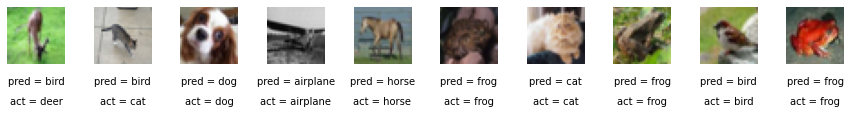

In [ ]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

**- Assignment 5: model및 training 환경을 자유롭게 변경하여 Accuracy 75% 이상을 달성해 보세요!**

In [ ]:
# 원래 모델을 자꾸 만지니 정확도가 오히려 떨어진다ㅜㅜ. (stride, activaion 함수등 만지면 떨어짐ㅜㅜㅜ)
# 다른 모델을 한번 참고해 보았습니다.

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense 

model = Sequential() 

# Convolutional Block (Conv-Conv-Pool-Dropout) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3))) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 

# Convolutional Block (Conv-Conv-Pool-Dropout) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 


model.add(Flatten())

model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_167 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_120 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 8, 8, 64)         

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 20 ,batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4682 - accuracy: 0.4642 - val_loss: 1.1244 - val_accuracy: 0.5934
Epoch 2/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0728 - accuracy: 0.6200 - val_loss: 0.9039 - val_accuracy: 0.6802
Epoch 3/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9318 - accuracy: 0.6713 - val_loss: 0.8040 - val_accuracy: 0.7192
Epoch 4/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8413 - accuracy: 0.7024 - val_loss: 0.8071 - val_accuracy: 0.7164
Epoch 5/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7818 - accuracy: 0.7269 - val_loss: 0.7390 - val_accuracy: 0.7469
Epoch 6/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7252 - accuracy: 0.7451 - val_loss: 0.7098 - val_accuracy: 0.7498
Epoch 7/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6882 - accuracy: 0.7579 - val_loss: 0.7078 -

### 정확도와 Loss 변동 시각화

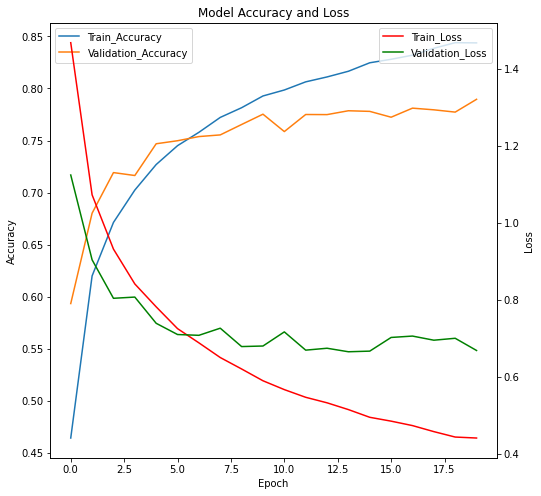

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot()
ax.plot(hist.history['accuracy'], label = "Train_Accuracy")
ax.plot(hist.history['val_accuracy'], label = "Validation_Accuracy")
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_title('Model Accuracy and Loss')
ax.legend()

ax2 = ax.twinx()
ax2.plot(hist.history['loss'], label = "Train_Loss", color = "red")
ax2.plot(hist.history['val_loss'], label = "Validation_Loss", color = "green")
ax2.set_ylabel('Loss')
ax2.legend()

In [ ]:
model.evaluate(X_test, y_test, batch_size=1000)

10/10 [==============================] - 2s 49ms/step - loss: 0.5317 - accuracy: 0.8273


[0.5317152738571167, 0.8273000121116638]

- 참조모델에서는 80% 이상의 정확도를 보여준다!!

# My Model

- 함수형 API로 진행
- 참조모델을 참고해 keras 함수형 API에 약간 변화를 주어 모델을 만들어 보았습니다.

In [ ]:
input_layer_n = Input(shape=(32,32,3))

x = Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', padding='same')(input_layer_n)
x = Conv2D(filters=32, kernel_size=3, strides=1,  activation='relu', padding='same')(x)
x = Dropout(0.25)(x) 

x = MaxPool2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', padding='same')(x)
x = Conv2D(filters=64, kernel_size=3, strides=1,  activation='relu', padding='same')(x)
x = Dropout(0.25)(x) 

x = MaxPool2D(pool_size=(2, 2))(x) 

x = Flatten()(x)

x = Dense(256)(x)
x = Activation('relu')(x)
x = Dropout(rate=0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer_n = Activation('softmax')(x)


model_n = Model(input_layer_n, output_layer_n)


In [ ]:
model_n.summary()

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_111 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 16, 16, 64)        369

In [ ]:
## learning_rate = 0.001 default 값
model_n.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.001), metrics=['accuracy'])

In [ ]:
history = model_n.fit(X_train,
            y_train,
            batch_size = 32,
            epochs=10,
            shuffle=True,
            validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.5080 - accuracy: 0.4493 - val_loss: 1.1746 - val_accuracy: 0.5947
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0817 - accuracy: 0.6176 - val_loss: 0.9353 - val_accuracy: 0.6759
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9008 - accuracy: 0.6842 - val_loss: 0.7994 - val_accuracy: 0.7256
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8085 - accuracy: 0.7172 - val_loss: 0.7787 - val_accuracy: 0.7380
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7230 - accuracy: 0.7458 - val_loss: 0.7673 - val_accuracy: 0.7334
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6798 - accuracy: 0.7605 - val_loss: 0.7378 - val_accuracy: 0.7412
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6359 - accuracy: 0.7766 - val_loss: 0.7173 -

##76.82%의 정확도를 보여준다 ~~ Good

In [ ]:
model_n.evaluate(X_test, y_test, batch_size=1000)

10/10 [==============================] - 2s 46ms/step - loss: 0.6717 - accuracy: 0.7682


[0.6717145442962646, 0.7681999802589417]

### 정확도와 Loss 변동 시각화

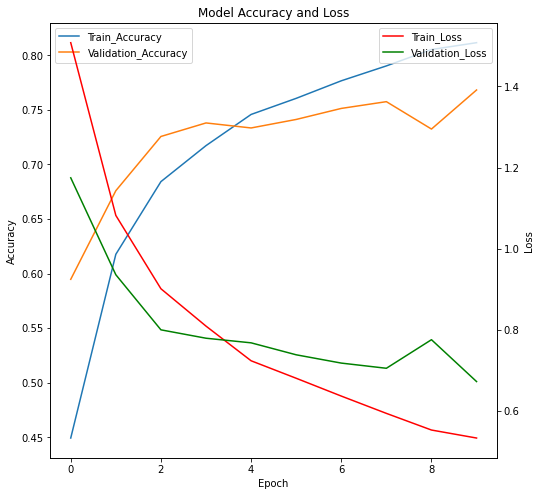

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot()
ax.plot(history.history['accuracy'], label = "Train_Accuracy")
ax.plot(history.history['val_accuracy'], label = "Validation_Accuracy")
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_title('Model Accuracy and Loss')
ax.legend()

ax2 = ax.twinx()
ax2.plot(history.history['loss'], label = "Train_Loss", color = "red")
ax2.plot(history.history['val_loss'], label = "Validation_Loss", color = "green")
ax2.set_ylabel('Loss')
ax2.legend()

## 위의 사진시각화 코드를 이용하여 제대로 맞추는지 확인해 보자 

In [ ]:
CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

preds = model_n.predict(X_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

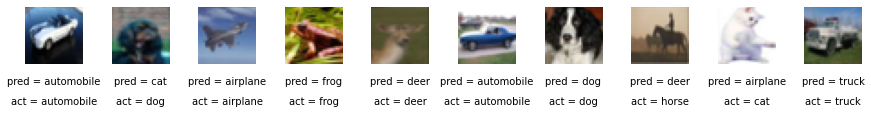

In [ ]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

### 잘못예측한 것 확인
- 개를 고양이로 예측 -> 사람눈으로 봐도 개인지 고양이인지 정확하게 파악이 안된다.
- 말을 사슴으로 예측
- 고양이를 비행기로 예측(?)